# 📊 Preprocesado de Datos - Proyectos Horizonte Europa

Este notebook tiene como función la limpieza y preparación de datos administrativos de proyectos europeos del Programa Marco, 9ª Edición (Horizonte Europa).

## Consideraciones Especiales:
- **Datos administrativos**: El dataset no contiene datos experimentales; no se eliminarán los nulos salvo casos muy incompletos.
- **Duplicados**: La variable `Ref.CSIC` se usará como clave primaria. Cualquier duplicado para esta variable será eliminado.
- **Variables string**: Muchas columnas numéricas son en realidad etiquetas (ej: `Ref.UE`, `Centro`). NO deben usarse para análisis estadisticos multivariable.
- **Normalización**: `Nombre centro IP` contiene etiquetas distintas para el mismo centro; debe normalizarse usando `Centro` como referencia.

## Contenido:
1. Carga y exploración inicial
2. Identificación de tipos de variables
3. Limpieza de duplicados (Ref.CSIC)
4. Normalización de nombres de centros
5. Conversión de tipos de datos
6. Procesamiento de fechas
7. Análisis de valores nulos (sin eliminar)
8. Exportación de datos limpios

In [28]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 1. Carga de Datos

In [29]:
#carga de datos desde hoja excel
df = pd.read_excel(
    '../data/9PM_bootcamp1.xlsx',
    dtype={'Centro': str, 'Ref.UE': str}
)

print(f"📁 Datos cargados: {df.shape[0]} filas (proyectos) y {df.shape[1]} columnas")
print(f"\n📋 Columnas encontradas:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")



📁 Datos cargados: 719 filas (proyectos) y 20 columnas

📋 Columnas encontradas:
   1. Ref.CSIC
   2. Ref.UE
   3. Situación
   4. Programa
   5. Acción clave
   6. Título
   7. Comienzo
   8. Final
   9. Duración (meses)
  10. Concedido
  11. CSIC
  12. España (no CSIC)
  13. Total (Csic, Esp. y otros)
  14. Cód.área
  15. Acrónimo del proyecto
  16. Convocatoria
  17. Centro
  18. Nombre Centro IP
  19. Resumen
  20. Keywords


# 2. Renombrar variables ambiguas

Se renombrarán las siguientes variables, actualmente con nombres ambiguos, para mayor claridad:

| **Variable Original** | **Nuevo Nombre** |
|----------------------|------------------|
| `Concedido` | `Importe Concedido` |
| `CSIC` | `Participantes CSIC` |
| `España (no CSIC)` | `Participantes España (no CSIC)` |
| `Total (Csic, Esp. y otros)` | `Total Participantes` |





In [30]:

renombres = {
    'Concedido': 'Importe Concedido',
    'CSIC': 'Participantes CSIC',
    'España (no CSIC)': 'Participantes España (no CSIC)',
    'Total (Csic, Esp. y otros)': 'Total Participantes'
}

# Aplicar renombres
df = df.rename(columns=renombres)

print ("Nombres de variables actualizadas:")
# Mostrar confirmación de cambios
for original, nuevo in renombres.items():
    if original in df.columns or nuevo in df.columns:
        print(f"   ✅ '{original}' → '{nuevo}'")


# Verificar nuevos nombres
print("\n📋 VARIABLES RENOMBRADAS DISPONIBLES:")
for nuevo_nombre in renombres.values():
    if nuevo_nombre in df.columns:
        print(f"   ✓ {nuevo_nombre}")

Nombres de variables actualizadas:
   ✅ 'Concedido' → 'Importe Concedido'
   ✅ 'CSIC' → 'Participantes CSIC'
   ✅ 'España (no CSIC)' → 'Participantes España (no CSIC)'
   ✅ 'Total (Csic, Esp. y otros)' → 'Total Participantes'

📋 VARIABLES RENOMBRADAS DISPONIBLES:
   ✓ Importe Concedido
   ✓ Participantes CSIC
   ✓ Participantes España (no CSIC)
   ✓ Total Participantes


## 3. Clasificación de Variables

El dataset contiene variables de distinto tipo: identificadores, variables categóricas, descriptivas... y solo algunas numéricas. Es necesario clasificarlas correctamente y tener en cuenta esta clasificación para su análisis.


In [31]:
# Definir clasificación de variables según su función REAL en datos administrativos
variables_config = {
    'identificadores': ['Ref.CSIC', 'Ref.UE', 'Acrónimo del proyecto'],  # Códigos únicos
    'categoricas': ['Situación', 'Programa', 'Acción clave', 'Convocatoria', 'Cód.área','Centro', 'Nombre Centro IP'],  # Variables categóricas
    'descriptivas': ['Título', 'Resumen', 'Keywords'],  # Texto libre para búsqueda
    'numericas': ['Importe Concedido','Duración (meses)',  'Participantes CSIC', 'Participantes España (no CSIC)', 'Total Participantes'], 
    'temporales': ['Comienzo', 'Final'],  # Fechas
}

print("📊 CLASIFICACIÓN DE VARIABLES SEGÚN TIPO:")
print("=" * 80)
for tipo, cols in variables_config.items():
    print(f"\n🔹 {tipo.upper()}:")
    for col in cols:
        if col in df.columns:
            print(f"   ✓ {col}")
        else:
            print(f"   ✗ {col} (no encontrada)")

# Verificar si hay columnas no clasificadas
columnas_no_clasificadas = set(df.columns) - {col for cols in variables_config.values() for col in cols}
if columnas_no_clasificadas:
    print(f"\n⚠️ COLUMNAS NO CLASIFICADAS:")
    for col in columnas_no_clasificadas:
        print(f"   ? {col}")

📊 CLASIFICACIÓN DE VARIABLES SEGÚN TIPO:

🔹 IDENTIFICADORES:
   ✓ Ref.CSIC
   ✓ Ref.UE
   ✓ Acrónimo del proyecto

🔹 CATEGORICAS:
   ✓ Situación
   ✓ Programa
   ✓ Acción clave
   ✓ Convocatoria
   ✓ Cód.área
   ✓ Centro
   ✓ Nombre Centro IP

🔹 DESCRIPTIVAS:
   ✓ Título
   ✓ Resumen
   ✓ Keywords

🔹 NUMERICAS:
   ✓ Importe Concedido
   ✓ Duración (meses)
   ✓ Participantes CSIC
   ✓ Participantes España (no CSIC)
   ✓ Total Participantes

🔹 TEMPORALES:
   ✓ Comienzo
   ✓ Final


Veamos el Data type de cada variable:

In [32]:
# Información detallada del dataset
print("📋 INFORMACIÓN DEL DATASET:")
print("=" * 70)
df.info()

📋 INFORMACIÓN DEL DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ref.CSIC                        695 non-null    object 
 1   Ref.UE                          694 non-null    object 
 2   Situación                       695 non-null    object 
 3   Programa                        692 non-null    object 
 4   Acción clave                    692 non-null    object 
 5   Título                          695 non-null    object 
 6   Comienzo                        691 non-null    object 
 7   Final                           691 non-null    object 
 8   Duración (meses)                690 non-null    float64
 9   Importe Concedido               695 non-null    float64
 10  Participantes CSIC              693 non-null    float64
 11  Participantes España (no CSIC)  693 non-null    float64
 12  Total Par


Para evitar errores, es preferible modificar el tipo de dato para las variables numéricas.

| **Variable** | **Tipo Actual** | **Tipo Objetivo** |
|-------------|----------------|-------------------|
| `Duración (meses)` | `float64` | `int64` |
| `Importe Concedido` | `float64` | `float64` (Se mantiene igual)|
| `Participantes CSIC` | `float64` | `int64` |
| `Participantes España (no CSIC)` | `float64` | `int64` |
| `Total Participantes` | `float64` | `int64` |
| `Cód.área` | `float64` | `object` Código identificador, no es variable numérica|



> **⚠️ Nota importante**: Aunque `Centro` y `Cód.área` contengan números, representan códigos identificadores y deben tratarse como texto para evitar operaciones matemáticas incorrectas.


In [33]:

# 1. Variables enteras (sin decimales)
variables_enteras = ['Duración (meses)', 'Participantes CSIC', 'Participantes España (no CSIC)', 'Total Participantes']

for var in variables_enteras:
    if var in df.columns:
        df[var] = df[var].astype('Int64')  # Int64 permite valores nulos
        print(f"   ✅ {var} → int64")

# 2. Variables que son códigos identificadores (Cód.área)

if 'Cód.área' in df.columns:
    df['Cód.área'] = pd.to_numeric(df['Cód.área'], errors='coerce').astype('Int64')
    df['Cód.área'] = df['Cód.área'].astype(str).replace('<NA>', pd.NA)
    print(f"   ✅ Cód.área → int64 → object (código identificador)")

# 3. Importe Concedido se mantiene como float64
print(f"   ✅ Importe Concedido → float64 (se mantiene)")

print("\n📊 Verificación de tipos de datos:")
tipos_relevantes = ['Duración (meses)', 'Importe Concedido', 'Participantes CSIC', 
                   'Participantes España (no CSIC)', 'Total Participantes', 'Centro', 'Cód.área']

for var in tipos_relevantes:
    if var in df.columns:
        print(f"   {var}: {df[var].dtype}")


   ✅ Duración (meses) → int64
   ✅ Participantes CSIC → int64
   ✅ Participantes España (no CSIC) → int64
   ✅ Total Participantes → int64
   ✅ Cód.área → int64 → object (código identificador)
   ✅ Importe Concedido → float64 (se mantiene)

📊 Verificación de tipos de datos:
   Duración (meses): Int64
   Importe Concedido: float64
   Participantes CSIC: Int64
   Participantes España (no CSIC): Int64
   Total Participantes: Int64
   Centro: object
   Cód.área: object


Ahora veamos si los cambios se han aplicado correctamente:

In [34]:
# Vista previa de datos
print("🔍 PRIMERAS FILAS DEL DATASET:")
print("=" * 70)
display(df.head())

print("\n📊 INFORMACIÓN BÁSICA:")
print(f"Total proyectos: {len(df)}")

🔍 PRIMERAS FILAS DEL DATASET:


,Ref.CSIC,Ref.UE,Situación,Programa,Acción clave,Título,Comienzo,Final,Duración (meses),Importe Concedido,Participantes CSIC,Participantes España (no CSIC),Total Participantes,Cód.área,Acrónimo del proyecto,Convocatoria,Centro,Nombre Centro IP,Resumen,Keywords
0,EUROHPC/1238,101196247,VIGENTE,JOINT UNDERTAKING,JOINT UNDERTAKING,Europe-India Partnership for Scientific High-P...,01/02/2025,31/01/2028,36,302687.50,1,2,10,8903,GANANA,HORIZON-EUROHPC-JU-2023-INCO-06-01,030102,GEOCIENCIAS BARCELONA,HIGH-PERFORMANCE COMPUTING (HPC) IS A MAJOR EN...,NaN
1,HE/CBE/0653,101214822,VIGENTE,JOINT UNDERTAKING,JOINT UNDERTAKING,Bio-based in Soil applications with Optimal bi...,01/09/2025,31/08/2029,48,273837.50,1,6,16,8908,SOUL,HORIZON-JU-CBE-2024,020401,INSTO. CATALISIS Y PETROLEOQUIMICA,THE USE OF PLASTIC PRODUCTS HAS INCREASED SIGN...,IMPROVED CONTROLLED BIODEGRADABILIY; IMPROVED ...
2,HE/CBE/0653,101214822,VIGENTE,JOINT UNDERTAKING,JOINT UNDERTAKING,Bio-based in Soil applications with Optimal bi...,01/09/2025,31/08/2029,48,273837.50,1,6,16,8908,SOUL,HORIZON-JU-CBE-2024,020401,INSTO. CATALISIS Y PETROLEOQUIMICA,THE USE OF PLASTIC PRODUCTS HAS INCREASED SIGN...,IMPROVED CONTROLLED BIODEGRADABILIY; IMPROVED ...
3,HE/CLEANH2/0431,101137792,VIGENTE,JTI-CLEANH2,JTI-CLEANH2,A novel multi-stage steam gasification and syn...,01/01/2024,31/12/2027,48,220047.50,1,10,16,8908,HYIELD,HORIZON-JTI-CLEANH2-2023-1,020403,INSTO. CARBOQUIMICA,EUROPE FACES THE JOINT CHALLENGE OF DECARBONIS...,NaN
4,HE/CLEANH2/0571,101137756,VIGENTE,JTI-CLEANH2,JTI-CLEANH2,Carbon-negative pressurized hydrogen productio...,01/10/2024,30/09/2028,48,224156.25,0,0,0,8908,CARMA-H2,HORIZON-JTI-CLEANH2-2023-1,020166,INSTO. TECNOLOGIA QUIMICA,CARMA-H2 WILL ENABLE HIGHLY ATTRACTIVE HYDROGE...,CARBON NEGATIVE ELECTROCHEMICAL HYDROGEN PRODU...



📊 INFORMACIÓN BÁSICA:
Total proyectos: 719


Ahora las variables numéricas tienen el formato correcto

## 4. Eliminación de Duplicados

Al reflejar cada registro un proyecto individual, los campos que actuan como clave (`Ref. CSIC`, `Ref. UE`, `Acrónimo del proyecto`) no deberían repetirse. A continuación se detectan y eliminan posibles duplicados en base a `Ref.CSIC` (anteriormente se eliminan los nulos).

In [35]:
# Eliminar filas con Ref.CSIC nulo
print("🧹 ELIMINACIÓN DE NULOS Y DUPLICADOS EN Ref.CSIC")
print("=" * 60)

# 1. Eliminar filas donde Ref.CSIC es nulo
filas_antes = len(df)
df = df.dropna(subset=['Ref.CSIC'])
filas_despues_nulos = len(df)
nulos_eliminados = filas_antes - filas_despues_nulos

print(f"✅ Filas con Ref.CSIC nulo eliminadas: {nulos_eliminados}")

# 2. Eliminar duplicados por Ref.CSIC (mantener primera ocurrencia)
df = df.drop_duplicates(subset=['Ref.CSIC'], keep='first')
filas_final = len(df)
duplicados_eliminados = filas_despues_nulos - filas_final

print(f"✅ Duplicados por Ref.CSIC eliminados: {duplicados_eliminados}")
print(f"📊 Dataset final: {filas_final} proyectos únicos")



🧹 ELIMINACIÓN DE NULOS Y DUPLICADOS EN Ref.CSIC
✅ Filas con Ref.CSIC nulo eliminadas: 24
✅ Duplicados por Ref.CSIC eliminados: 1
📊 Dataset final: 694 proyectos únicos


## 5. Normalización de Nombres de Centros

**CRÍTICO**: `nombre centro IP` puede tener variaciones (abreviaturas).  
Normalizar usando `Centro` (código) como referencia.

In [38]:
# Explorar relación Centro - nombre centro IP
if 'Centro' in df.columns and 'Nombre Centro IP' in df.columns:
    print("🔍 ANÁLISIS DE NOMBRES DE CENTROS:")
    print("=" * 70)
    
    # Agrupar por código de centro y ver variaciones de nombres
    centro_nombres = df.groupby('Centro')['Nombre Centro IP'].unique()
    
    # Detectar centros con múltiples nombres
    centros_multiples = {centro: nombres for centro, nombres in centro_nombres.items() 
                         if len(nombres) > 1}
    
    if centros_multiples:
        print(f"\n⚠️ Se encontraron {len(centros_multiples)} centros con múltiples variaciones de nombre:")
        for centro, nombres in list(centros_multiples.items())[:10]:  # Mostrar primeros 10
            print(f"\n  Centro código: {centro}")
            for nombre in nombres:
                print(f"    - {nombre}")
    else:
        print("✅ No se encontraron variaciones en nombres de centros")

🔍 ANÁLISIS DE NOMBRES DE CENTROS:
✅ No se encontraron variaciones en nombres de centros


In [39]:
# Normalizar nombres de centros usando el nombre más frecuente por código
if 'Centro' in df.columns and 'Nombre Centro IP' in df.columns:
    # Crear mapeo: código centro → nombre más frecuente
    centro_nombre_map = {}
    
    for centro in df['Centro'].unique():
        if pd.notna(centro):
            # Obtener nombre más frecuente para este centro
            nombres = df[df['Centro'] == centro]['Nombre Centro IP']
            nombre_frecuente = nombres.mode()[0] if len(nombres.mode()) > 0 else nombres.iloc[0]
            centro_nombre_map[centro] = nombre_frecuente
    
    # Aplicar normalización
    df['Nombre Centro IP Normalizado'] = df['Centro'].map(centro_nombre_map)
    
    # Contar cambios
    cambios = (df['Nombre Centro IP'] != df['Nombre Centro IP Normalizado']).sum()
    print(f"\n✅ Normalización completada:")
    print(f"   Total de registros con nombre normalizado: {cambios}")
    print(f"   Centros únicos: {df['Nombre Centro IP Normalizado'].nunique()}")

    # Mostrar ejemplo de normalización
    if cambios > 0:
        print("\n📊 Ejemplos de normalización:")
        ejemplos = df[df['Nombre Centro IP'] != df['Nombre Centro IP Normalizado']][
            ['Centro', 'Nombre Centro IP', 'Nombre Centro IP Normalizado']
        ].head(5)
        display(ejemplos)


✅ Normalización completada:
   Total de registros con nombre normalizado: 0
   Centros únicos: 118


## 6. Conversión de Variables temporales

Modificar el tipo de dato de las variables temporales para asegurarse de que tengan el tipo correcto

In [40]:
# Convertir variables temporales a formato datetime
print("🗓️ CONVERSIÓN DE VARIABLES TEMPORALES:")
print("=" * 60)

# Variables temporales a convertir
variables_temporales = ['Comienzo', 'Final']

for var in variables_temporales:
    if var in df.columns:
        # Convertir a datetime
        df[var] = pd.to_datetime(df[var], errors='coerce')
        print(f"   ✅ {var} → datetime64[ns]")

# Verificar conversión
print("\n📊 Verificación de tipos de datos temporales:")
for var in variables_temporales:
    if var in df.columns:
        print(f"   {var}: {df[var].dtype}")
        # Mostrar rango de fechas
        fecha_min = df[var].min()
        fecha_max = df[var].max()
        print(f"     Rango: {fecha_min} a {fecha_max}")

print("\n✅ Conversión de variables temporales completada")

🗓️ CONVERSIÓN DE VARIABLES TEMPORALES:
   ✅ Comienzo → datetime64[ns]
   ✅ Final → datetime64[ns]

📊 Verificación de tipos de datos temporales:
   Comienzo: datetime64[ns]
     Rango: 2021-01-01 00:00:00 a 2026-01-09 00:00:00
   Final: datetime64[ns]
     Rango: 2022-12-31 00:00:00 a 2034-05-31 00:00:00

✅ Conversión de variables temporales completada


## 7. Limpieza de Strings

Eliminar espacios y normalizar formato

In [41]:
# Limpiar columnas de texto
text_columns = df.select_dtypes(include=['object']).columns

for col in text_columns:
    if col in df.columns and df[col].dtype == 'object':
        # Eliminar espacios al inicio y final
        df[col] = df[col].str.strip()
        # Reemplazar múltiples espacios por uno solo
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True)

print(f"✅ Limpieza de {len(text_columns)} columnas de texto completada")

✅ Limpieza de 14 columnas de texto completada


## 8. Transformar Areas Científicas antiguas a nuevas

La variable `Cód.Área` hace referencia a las antiguas áreas científicas del CSIC. Se transformarán a las nuevas categorías: Vida, Materia y Sociedad (incluyendo tambien las categorías Central y Desconocido).

📊 ANÁLISIS DE VALORES NULOS:
                       Columna  Nulos  Porcentaje
19                    Keywords    462   64.255911
18                     Resumen    103   14.325452
8             Duración (meses)     29    4.033380
7                        Final     28    3.894298
6                     Comienzo     28    3.894298
4                 Acción clave     27    3.755216
3                     Programa     27    3.755216
11            España (no CSIC)     26    3.616134
12  Total (Csic, Esp. y otros)     26    3.616134
10                        CSIC     26    3.616134
1                       Ref.UE     25    3.477051
0                     Ref.CSIC     24    3.337969
2                    Situación     24    3.337969
5                       Título     24    3.337969
9                    Concedido     24    3.337969
13                    Cód.área     24    3.337969
15                Convocatoria     24    3.337969
14       Acrónimo del proyecto     24    3.337969
17            Nombre 

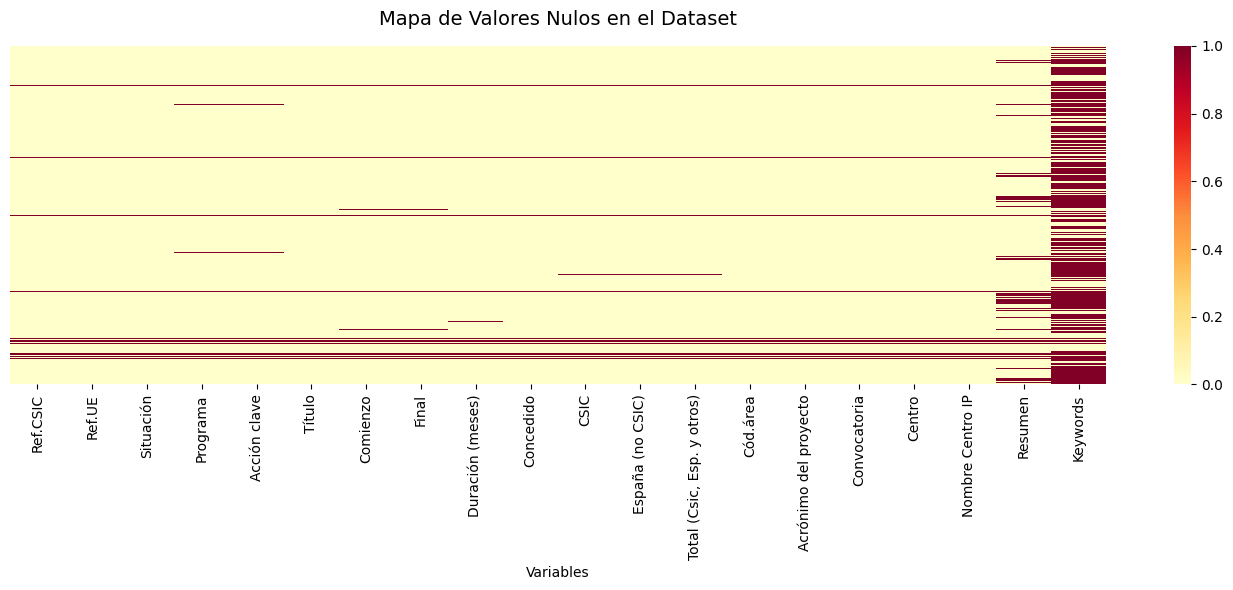

In [15]:
# Visualización de nulos
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='YlOrRd', yticklabels=False)
plt.title('Mapa de Valores Nulos en el Dataset', fontsize=14, pad=15)
plt.xlabel('Variables')
plt.tight_layout()
plt.show()

## 8. Creación de Variables Derivadas

Extraer información adicional útil para análisis

In [16]:
# Extraer información temporal
if 'Comienzo' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Comienzo']):
    df['Año Inicio'] = df['Comienzo'].dt.year
    df['Mes Inicio'] = df['Comienzo'].dt.month
    df['Año Inicio (string)'] = df['Año Inicio'].astype(str)
    print("✅ Variables temporales creadas (Año Inicio, Mes Inicio)")

if 'Final' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Final']):
    df['Año Fin'] = df['Final'].dt.year
    print("✅ Año Fin creado")

# Calcular presupuesto por mes
if 'Concedido' in df.columns and 'Duración(meses)' in df.columns:
    df['Presupuesto Mensual'] = df.apply(
        lambda row: row['Concedido'] / row['Duración(meses)'] 
        if pd.notna(row['Duración(meses)']) and row['Duración(meses)'] > 0 
        else np.nan, 
        axis=1
    )
    print("✅ Presupuesto Mensual calculado")

# Categorizar duración de proyectos
if 'Duración(meses)' in df.columns:
    def categorizar_duracion(meses):
        if pd.isna(meses):
            return 'Sin especificar'
        elif meses <= 12:
            return 'Corto (≤12 meses)'
        elif meses <= 36:
            return 'Medio (13-36 meses)'
        else:
            return 'Largo (>36 meses)'
    
    df['Categoría Duración'] = df['Duración(meses)'].apply(categorizar_duracion)
    print("✅ Categoría Duración creada")

# Categorizar presupuesto
if 'Concedido' in df.columns:
    def categorizar_presupuesto(cantidad):
        if pd.isna(cantidad):
            return 'Sin especificar'
        elif cantidad < 100000:
            return 'Pequeño (<100K)'
        elif cantidad < 500000:
            return 'Medio (100K-500K)'
        elif cantidad < 1000000:
            return 'Grande (500K-1M)'
        else:
            return 'Muy Grande (>1M)'
    
    df['Categoría Presupuesto'] = df['Concedido'].apply(categorizar_presupuesto)
    print("✅ Categoría Presupuesto creada")

print("\n✅ Todas las variables derivadas creadas exitosamente")

✅ Variables temporales creadas (Año Inicio, Mes Inicio)
✅ Año Fin creado
✅ Categoría Presupuesto creada

✅ Todas las variables derivadas creadas exitosamente


## 9. Resumen Final del Preprocesado

In [17]:
# Resumen completo del dataset preprocesado
print("=" * 80)
print("📊 RESUMEN FINAL DEL DATASET PREPROCESADO")
print("=" * 80)

print(f"\n📁 DIMENSIONES:")
print(f"   Total de proyectos: {df.shape[0]:,}")
print(f"   Total de variables: {df.shape[1]}")

print(f"\n📅 PERÍODO TEMPORAL:")
if 'Comienzo' in df.columns:
    print(f"   Primer proyecto: {df['Comienzo'].min()}")
    print(f"   Último proyecto: {df['Final'].max() if 'Final' in df.columns else 'N/A'}")

print(f"\n💰 PRESUPUESTO:")
if 'Concedido' in df.columns:
    print(f"   Total concedido: {df['Concedido'].sum():,.2f} €")
    print(f"   Promedio por proyecto: {df['Concedido'].mean():,.2f} €")

print(f"\n🏛️ PARTICIPACIÓN:")
if 'CSIC' in df.columns:
    print(f"   Centros CSIC participantes: {df['CSIC'].sum()}")
if 'España (no CSIC)' in df.columns:
    print(f"   Centros españoles (no CSIC): {df['España (no CSIC)'].sum()}")

print(f"\n📊 PROGRAMAS:")
if 'programa' in df.columns:
    print(f"   Programas únicos: {df['programa'].nunique()}")
    print(f"   Top 3 programas:")
    for i, (prog, count) in enumerate(df['programa'].value_counts().head(3).items(), 1):
        print(f"      {i}. {prog}: {count} proyectos")

print(f"\n⚠️ VALORES NULOS:")
print(f"   Total: {df.isnull().sum().sum():,} valores nulos")
print(f"   Nota: Los nulos NO han sido eliminados (datos administrativos)")

print(f"\n✅ TRANSFORMACIONES APLICADAS:")
print(f"   ✓ Duplicados por Ref.CSIC eliminados")
print(f"   ✓ Nombres de centros normalizados")
print(f"   ✓ Tipos de datos convertidos correctamente")
print(f"   ✓ Variables derivadas creadas")

print("\n" + "=" * 80)

📊 RESUMEN FINAL DEL DATASET PREPROCESADO

📁 DIMENSIONES:
   Total de proyectos: 719
   Total de variables: 25

📅 PERÍODO TEMPORAL:
   Primer proyecto: 2021-01-01 00:00:00
   Último proyecto: 2034-05-31 00:00:00

💰 PRESUPUESTO:
   Total concedido: 336,698,452.57 €
   Promedio por proyecto: 484,458.21 €

🏛️ PARTICIPACIÓN:
   Centros CSIC participantes: 305.0
   Centros españoles (no CSIC): 453.0

📊 PROGRAMAS:

⚠️ VALORES NULOS:
   Total: 1,107 valores nulos
   Nota: Los nulos NO han sido eliminados (datos administrativos)

✅ TRANSFORMACIONES APLICADAS:
   ✓ Duplicados por Ref.CSIC eliminados
   ✓ Nombres de centros normalizados
   ✓ Tipos de datos convertidos correctamente
   ✓ Variables derivadas creadas



## 10. Exportación de Datos Limpios

In [18]:
# Guardar dataset preprocesado
df.to_csv('../data/9PM_bootcamp_clean.csv', index=False, encoding='utf-8')
df.to_excel('../data/9PM_bootcamp_clean.xlsx', index=False)

print("✅ Datos exportados exitosamente:")
print("   📁 ../data/9PM_bootcamp_clean.csv")
print("   📁 ../data/9PM_bootcamp_clean.xlsx")
print(f"\n📊 Total de proyectos exportados: {len(df):,}")

✅ Datos exportados exitosamente:
   📁 ../data/9PM_bootcamp_clean.csv
   📁 ../data/9PM_bootcamp_clean.xlsx

📊 Total de proyectos exportados: 719
